In [ ]:
#https://www.kaggle.com/c/nlp-getting-started/data


In [79]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
test= pd.read_csv("/Users/gauravtyagi/Downloads/Data/nlp-getting-started/test.csv")
train= pd.read_csv("/Users/gauravtyagi/Downloads/Data/nlp-getting-started/train.csv")

In [81]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [82]:
train.columns 

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [83]:
train.shape

(7613, 5)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [85]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [86]:
np.sum(train.isnull().any(axis=1))

2533

In [87]:
np.sum(train.isna().any(axis=1))

2533

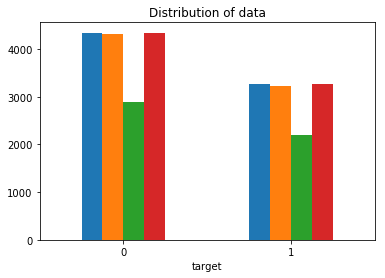

In [88]:
# Plotting the distribution for dataset.
ax = train.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['0','1'], rotation=0)
# Storing data in lists.
text, sentiment = list(train['text']), list(train['target'])

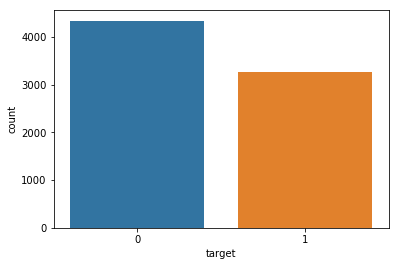

In [89]:
import seaborn as sns
sns.countplot(x='target', data=train)

In [90]:
def data_processing(data) :
    data = data.dropna(axis=0)
    data.fillna(0, inplace=True)
    data['location']=data['location'].fillna('')
    data['keyword']=data['keyword'].fillna('')
    data['text']=data['text'].str.lower()
    return data

In [91]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [114]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words]);
    #data['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
    #data['text'].head()

In [93]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(data):
    translator = str.maketrans('', '', punctuations_list)
    return data.translate(translator)
    #data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
    #data['text'].tail()

In [94]:
def cleaning_repeating_char(data):
    return re.sub(r'(.)1+', r'1', data);
    #data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
    #data['text'].tail()

In [95]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data);
    #data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
    #data['text'].tail()

In [96]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [97]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
def tokenize(data) :
    return data['text'].apply(tokenizer.tokenize);

In [98]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

In [99]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

In [100]:
X=train.text
y=train.target

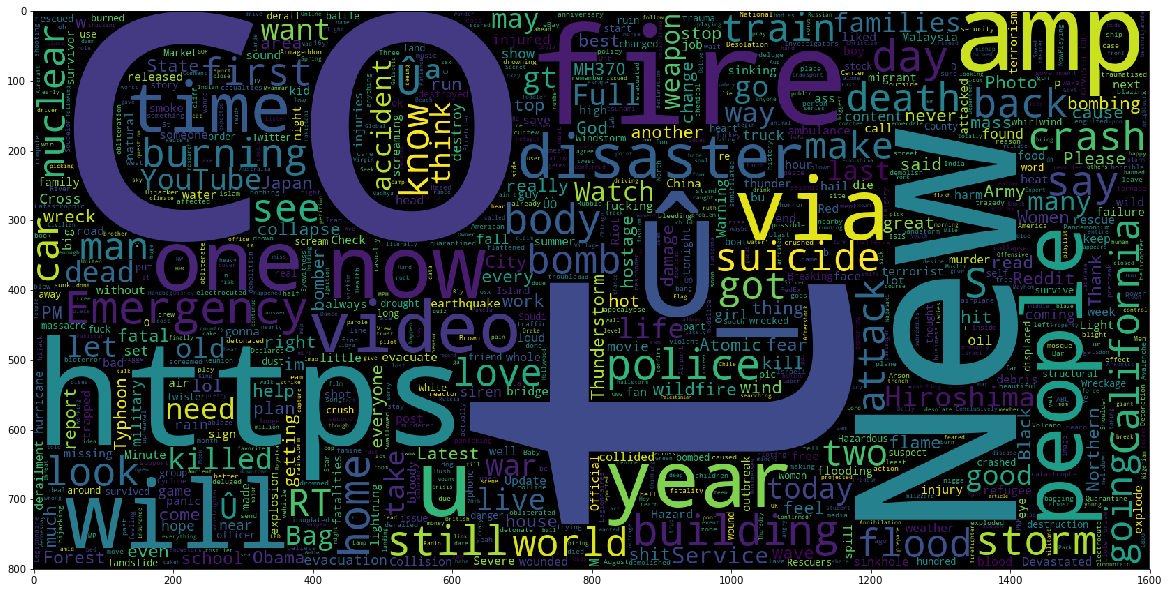

In [101]:
data_neg = train['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

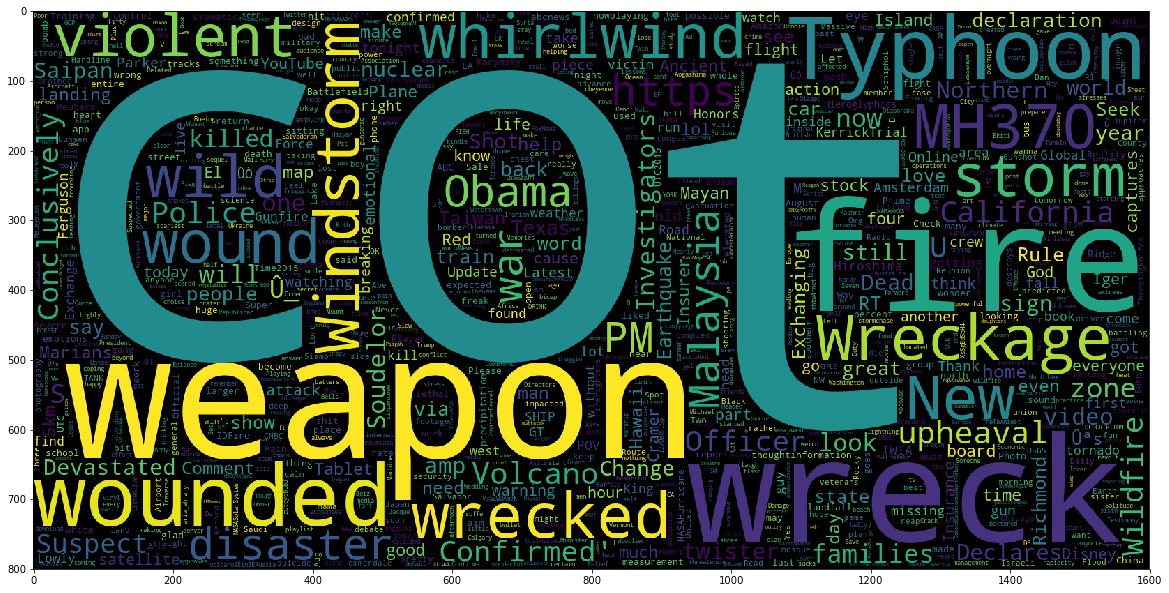

In [102]:
data_pos = train['text'][7000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [139]:
def process_final_data(data):
    data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
    data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
    data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
    data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
    data['text'].apply(lambda x: cleaning_numbers(x))
    data = tokenize(data)
    #data['text']= data['text'].apply(lambda x: stemming_on_text(x))
    #data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))
    return data;

In [140]:
x_train = process_final_data(train)

In [141]:
x_train, x_test, y_train, y_test = train_test_split(train['text'], train['target'], test_size=0.25, random_state=0)

In [142]:
#y_train

In [143]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  60055
